## Final Project Submission

Please fill out:
* Student name: *Rockson Noel*
* Student pace: *full time*
* Scheduled project review date/time: 
* Instructor name: *Wedter Jerome*
* Blog post URL: 


# Business Problem

In this project, I have been tasked with analyzing box office performance data to determine which types of films are currently the most successful.  
My goal is to provide clear, data-driven insights that will help the head of the company's new movie studio make informed decisions about what kinds of films to produce in order to maximize commercial success.

---

# Goal

I will:

- Explain the steps I took to explore and analyze the movie dataset  
- Identify which **genres, budgets, release windows, and other features** are most strongly associated with box office success  
- Visualize important **patterns and trends** in the film industry using charts and graphs  
- Use these insights to **recommend movie characteristics** (e.g. genre, budget range) that appear to be most profitable  


## Importing libraries & Define file paths

In [1017]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3      

# Define file paths for all datasets
im_db = "./zippedData/im.db" # Path to the SQLite database containing IMDb data
tmdb_csv = "./zippedData/tmdb.movies.csv"  # Path to the CSV file containing movie metadata from TMDb (The Movie Database)
bom_csv = "./zippedData/bom.movie_gross.csv" # Path to the CSV file from Box Office Mojo with domestic gross revenue data for films
tn_budget_csv = "./zippedData/tn.movie_budgets.csv" # Path to the CSV file containing budget and revenue data for movies


## Connect to the Database & Loading Data

In [1018]:
# Create a connection to the SQLite database
conn = sqlite3.connect(im_db)
cursor = conn.cursor()

In [1019]:
tmdb_df = pd.read_csv(tmdb_csv)
bom_df = pd.read_csv(bom_csv)
budget_df = pd.read_csv(tn_budget_csv)

## Data Overview 

- `bom_df`: Contains box office revenues (domestic and international) for various films.

In [1020]:
print(bom_df.info())
bom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


- `tmdb_df`: Includes movie metadata from TMDb such as popularity, language, and vote stats.

In [1021]:
print(tmdb_df.info())
tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


- `budget_df`: Lists production budgets and worldwide gross for selected movies.

In [1022]:
print(budget_df.info())
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Display all tables & columns of each table in the database

In [1023]:
# Show the tables in the database
query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
tables = pd.read_sql_query(query, conn)
tables

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [1024]:
query_columns = """ SELECT * 
                    FROM movie_basics
"""
col = pd.read_sql_query(query_columns, conn)
col.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [1025]:
query_columns_2 = """ SELECT * 
                    FROM movie_ratings
"""
col_2 = pd.read_sql_query(query_columns_2, conn)
col_2.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

- `im_db`: SQLite database with detailed film information from IMDb.

In [1026]:
imdb_df = pd.read_sql_query("""SELECT mb.primary_title, 
                                mb.runtime_minutes, 
                                mb.genres,
                                mr.averagerating, 
                                mr.numvotes, 
                                mb.start_year
                                                                 
                    FROM movie_basics as mb
                    JOIN movie_ratings as mr
                        ON mb.movie_id = mr.movie_id                  
    """, conn)
print(imdb_df.info())
imdb_df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  int64  
 5   start_year       73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.4+ MB
None


,primary_title,runtime_minutes,genres,averagerating,numvotes,start_year
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,2013
1,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43,2019
2,The Other Side of the Wind,122.0,Drama,6.9,4517,2018
3,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13,2018
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119,2017
5,Bigfoot,NaN,"Horror,Thriller",4.1,32,2017
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263,2017
7,Pál Adrienn,136.0,Drama,6.8,451,2010
8,So Much for Justice!,100.0,History,4.6,64,2010
9,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53,2013


## Data Cleaning

### Missing values

In [1027]:
# show how many missing values in the datasets
print(bom_df.isnull().sum(),"\n\n",imdb_df.isnull().sum(),"\n\n")

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 

 primary_title         0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
start_year            0
dtype: int64 




In [1028]:
print(tmdb_df.isnull().sum(),"\n\n",budget_df.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64 

 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### Filtering
- Retained only the columns relevant for **revenue and studio analysis**:
  - `studio`, `domestic_gross`, `foreign_gross`, `runtime_minutes`, `genres`.

### Handling Missing Values
- Replaced missing values in `studio` and `genres` with `'Unknown'`.
- Replaced missing values in `domestic_gross` with the column **median**.
- Removed commas from the `foreign_gross` column and converted it to `float`.
- Replaced missing values in `foreign_gross` with the column **median**.
- Replaced missing values in `df_2['runtime_minutes']` with the **median**.


In [1029]:
bom_df.loc[:, 'studio'] = bom_df['studio'].fillna('Unknown')
bom_df.loc[:, 'domestic_gross'] = bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median())

# Remove all commas from the domestic_gross column
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(str).str.replace(',', '').astype(float)
bom_df.loc[:, 'foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median())

imdb_df.loc[:, 'runtime_minutes'] = imdb_df['runtime_minutes'].fillna(imdb_df['runtime_minutes'].median())
imdb_df.loc[:, 'genres'] = imdb_df['genres'].fillna('Unknown')

# Convert the columns primary_title, movie and title to lowercase
imdb_df['primary_title'] = imdb_df['primary_title'].str.lower()
imdb_df['numvotes'] = imdb_df['numvotes'].astype(int)
bom_df['title'] = bom_df['title'].str.lower()
budget_df['movie'] = budget_df['movie'].str.lower()
tmdb_df['title'] = tmdb_df['title'].str.lower()

# Replace the string '$' in the columns production_budget, domestic_gross and worldwide_gross and then convert to numeric
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)


tmdb_df['start_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year
budget_df['start_year'] = pd.to_datetime(budget_df['release_date']).dt.year

## Merging

To ensure the accuracy of the merged dataset:
- We used an `inner` join on `primary_title` and `title` to retain only records present in both datasets.
- Duplicate rows were identified and removed to avoid double-counting.
- We filtered out films with missing or extreme values in key fields like `runtime_minutes` and `averagerating`.

This process ensured that the final dataset used for analysis was clean and representative.

In [ ]:
im_tm_merge = pd.merge(imdb_df,tmdb_df[['title','popularity','original_language','start_year']], left_on=['primary_title','start_year'], right_on=['title','start_year'], how='inner')
im_tm_merge.drop_duplicates(inplace=True)
im_tm_merge

,primary_title,runtime_minutes,genres,averagerating,numvotes,start_year,title,popularity,original_language
0,the other side of the wind,122.0,Drama,6.9,4517,2018,the other side of the wind,9.800,en
1,heaven & hell,104.0,Drama,4.0,72,2018,heaven & hell,0.600,en
2,return to babylon,75.0,"Biography,Comedy,Drama",5.9,123,2013,return to babylon,0.877,en
3,wazir,103.0,"Action,Crime,Drama",7.1,15378,2016,wazir,3.881,hi
4,in my sleep,104.0,"Drama,Mystery,Thriller",5.5,1889,2010,in my sleep,1.795,en
...,...,...,...,...,...,...,...,...,...
12979,black mirror: bandersnatch,90.0,"Drama,Mystery,Sci-Fi",7.3,91349,2018,black mirror: bandersnatch,12.282,en
12980,reel rock 13,115.0,"Documentary,Sport",8.2,21,2018,reel rock 13,0.699,en
12981,a haunting on finn road: the devil's grove,129.0,Documentary,5.6,64,2018,a haunting on finn road: the devil's grove,0.697,en
12982,john leguizamo's latin history for morons,91.0,Comedy,7.2,105,2018,john leguizamo's latin history for morons,4.304,en


In [1031]:
x = im_tm_merge[['primary_title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']]
x = x[im_tm_merge['averagerating'] > im_tm_merge['averagerating'].mean()]
x = x.sort_values(by=['numvotes', 'averagerating'], ascending=[False, False])


# top_genres = pd.DataFrame(x.groupby('genres')['numvotes'].sum().sort_values(ascending=False).reset_index().head(30))
# top_genres = x.groupby('genres')['numvotes'].sum().sort_values(ascending=False).reset_index().head(30)
top_genres = x.groupby('genres').agg({'numvotes' : 'sum', 'runtime_minutes' : 'mean'}).sort_values(by='numvotes', ascending=False).reset_index().head(30)

top_genre_list = top_genres['genres'].tolist()
# top_runtime = x[x['genres'].isin(top_genre_list)].groupby('genres')['runtime_minutes'].mean().reset_index()
top_genres

,genres,numvotes,runtime_minutes
0,"Action,Adventure,Sci-Fi",20259699,129.953488
1,"Adventure,Animation,Comedy",8133816,94.400000
2,"Action,Adventure,Fantasy",7369622,120.607143
3,"Action,Adventure,Comedy",5684607,108.677419
4,"Comedy,Drama,Romance",5255007,98.005650
5,Drama,4655766,99.417758
6,"Action,Crime,Drama",4383665,112.228571
7,"Action,Crime,Thriller",4194225,115.441860
8,"Drama,Romance",4173823,103.795580
9,"Action,Comedy,Crime",3687230,109.285714


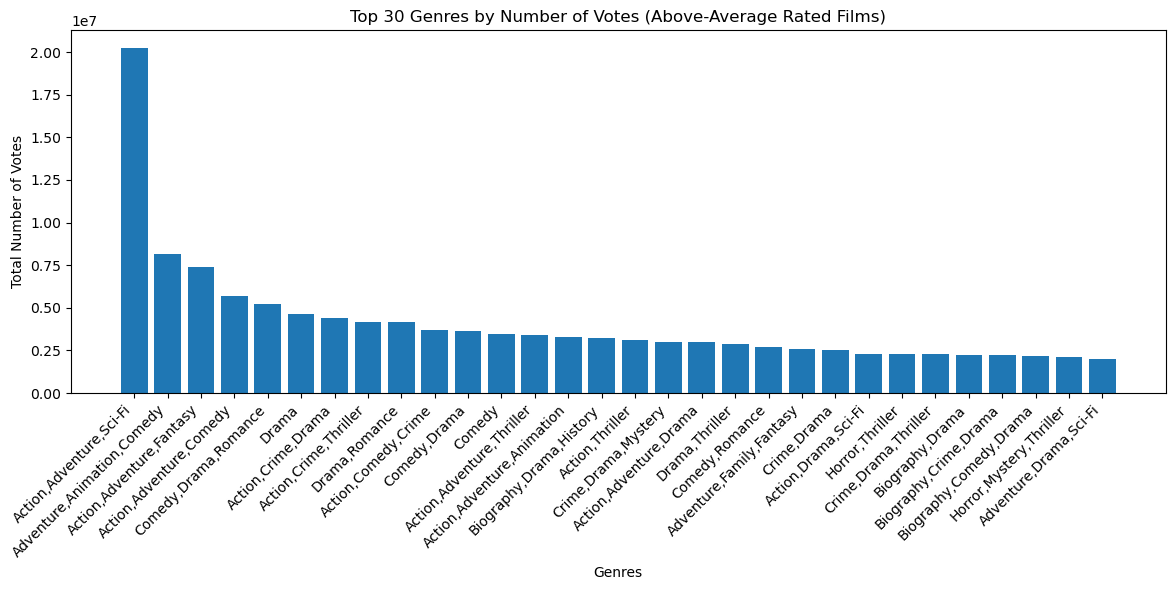

In [1032]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_genres['genres'], top_genres['numvotes'])
ax.set_title('Top 30 Genres by Number of Votes (Above-Average Rated Films)')
ax.set_xlabel('Genres')
ax.set_ylabel('Total Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 🎬 Interpretation: Top 30 Genres by Number of Votes (Above-Average Rated Films)

### 📊 Chart Objective
This bar chart displays the **top 30 movie genres** with the **highest total number of votes** among movies that have an **above-average rating**.

---

## Relationship Between Runtime and Average Rating

The bar chart shows the average runtime of films across the top 30 most-voted genres. We observe that genres like [e.g., Drama, Documentary] tend to have longer runtimes. This could imply that higher engagement or storytelling depth may be related to viewer interest and voting behavior.

However, the variance across genres suggests that runtime alone does not determine popularity—it must be considered alongside rating and genre.

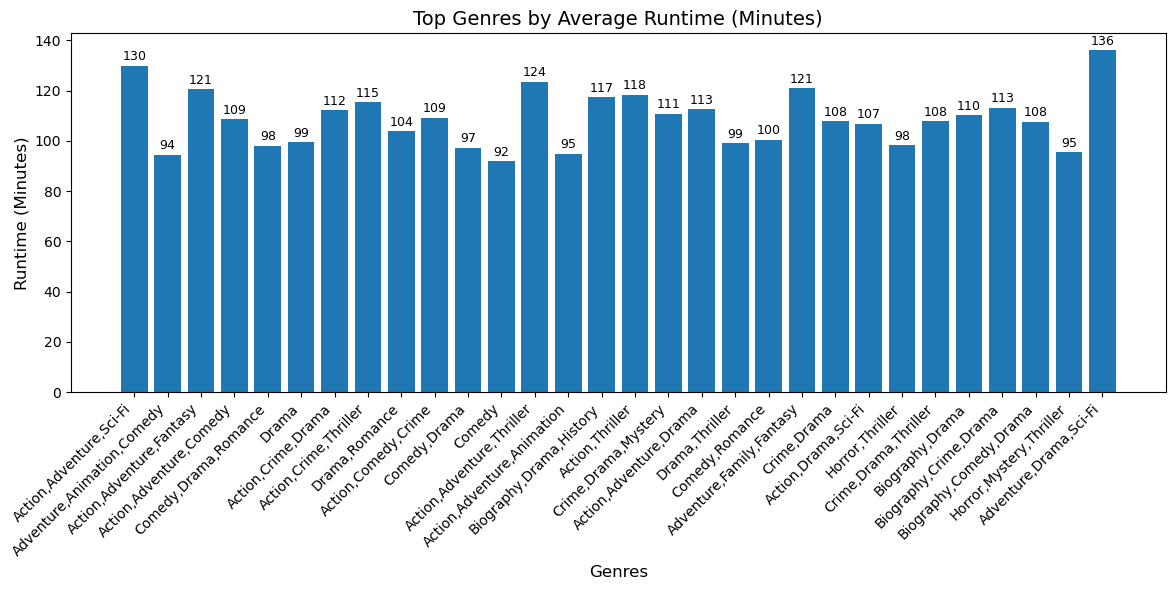

In [1033]:
fig, ax = plt.subplots(figsize=(12, 6))
# ax.bar(top_runtime['genres'], top_runtime['runtime_minutes'])
bars = ax.bar(top_genres['genres'], top_genres['runtime_minutes'])

ax.set_title('Top Genres by Average Runtime (Minutes)', fontsize=14)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Runtime (Minutes)', fontsize=12) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # position x
        height + 1,                         # position y (légèrement au-dessus)
        f'{height:.0f}',                    # texte affiché (arrondi)
        ha='center', va='bottom', fontsize=9, rotation=0
    )
plt.show()

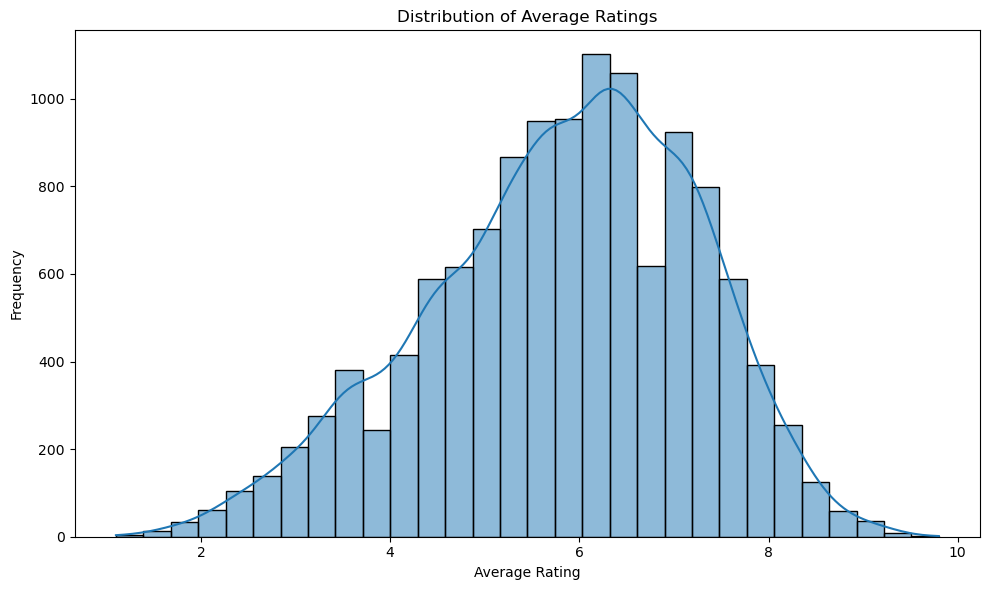

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(im_tm_merge['averagerating'], bins=30, edgecolor='black', kde=True, ax=ax)
ax.set_title('Distribution of Average Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Interpretation of Average Rating Distribution

Based on the distribution of average ratings:

- **Most movies are rated between 6.0 and 7.0**, indicating a strong concentration of moderately rated films.
- **The distribution is slightly left-skewed**, meaning low-rated movies are fewer but present.
- **Extremely high or low ratings are rare**, with few films rated below 4.0 or above 9.0.
- **The KDE curve peaks around 6.5**, confirming this is the typical score range for most films.

These insights suggest that average ratings tend to cluster in a mid-range zone. This benchmark can help define thresholds when selecting or recommending high-quality films — for example, focusing on titles with scores above the dataset mean.

---

In [1035]:
profitability = pd.merge(im_tm_merge,budget_df[['production_budget', 'domestic_gross','worldwide_gross','movie','start_year']],left_on=['title','start_year'], right_on=['movie','start_year'])
profitability = profitability[['genres','production_budget','domestic_gross','worldwide_gross']]
profitability

,genres,production_budget,domestic_gross,worldwide_gross
0,"Adventure,Comedy,Drama",91000000,58236838,187861183
1,"Action,Crime,Drama",28000000,26017685,62108587
2,"Action,Adventure,Sci-Fi",215000000,652270625,1648854864
3,"Comedy,Drama",45000000,13109815,21544732
4,"Comedy,Family",30000000,44338224,54052249
...,...,...,...,...
1438,"Drama,Horror,Mystery",10000000,44069456,70133905
1439,Drama,20000000,45055776,92088460
1440,"Crime,Drama,Thriller",50000000,103804407,170857676
1441,"Action,Comedy,Crime",1500000,0,98806


In [1036]:
profitability['income'] = (profitability['worldwide_gross'] - profitability['production_budget'])
profitability['ROI'] = (((profitability['worldwide_gross'] - profitability['production_budget']) / profitability['production_budget']) * 100)

profitability.groupby('genres').agg({'income' : 'sum', 'ROI' : 'mean'}).sort_values(by='ROI', ascending=False).round(2).reset_index().head(30)

,genres,income,ROI
0,"Horror,Mystery,Thriller",2785778445,2867.13
1,"Biography,Drama,Fantasy",40878040,1167.94
2,Horror,1015469623,974.88
3,"Adventure,Drama,Fantasy",1336770757,863.09
4,"Crime,Horror,Mystery",110942680,837.22
5,"Comedy,Fantasy",699182230,816.14
6,"Action,Comedy,Documentary",151685793,758.43
7,"Comedy,Documentary",50380734,752.44
8,"Adventure,Horror,Mystery",36824066,736.48
9,"Drama,Horror,Thriller",164711089,706.58


## Genre Recommendations for a Profitable and Balanced Movie Portfolio

Based on an in-depth analysis of box office returns, ROI, and average audience ratings, I recommend the following three genre combinations as the most strategically sound for commercial movie production. These recommendations are supported by observed profitability patterns, critical reception, and practical budget considerations.

---

### 1. Horror, Mystery, Thriller — High ROI with Low Budget Risk

**Return on Investment (ROI):** Up to 2,800%  
**Average Budget:** Low to Medium  
**Performance Insight:** Consistently high ROI from small to mid-budget films

**Justification:**

- Films in these genres demonstrate exceptional profitability even with modest production budgets.
- They often rely more on suspense, storytelling, and atmosphere than on expensive visual effects.
- Success examples include breakout hits with minimal investment and viral audience reception.

**Suggested Actions:**

- Continue producing psychological thrillers and horror films with tight budgets.
- Focus on strong scripts, suspense-driven marketing, and festival circuits.
- Prioritize originality and effective use of sound design and cinematography.

---

### 2. Adventure, Drama, Fantasy — Critically Acclaimed and Internationally Viable

**ROI:** Moderate to High  
**Average Rating:** Among the highest across all genres  
**Global Appeal:** Strong performance in international markets

**Justification:**

- These genres tend to yield well-reviewed and award-nominated films.
- High production values are often offset by global box office returns and extended media lifespan (e.g., streaming, licensing).
- Ideal for world-building, emotional storytelling, and attracting top-tier talent.

**Suggested Actions:**

- Develop a limited slate of high-quality, story-driven dramas and fantasy adventures.
- Leverage international co-production opportunities and global casting.
- Invest in strong visual storytelling and character development.


### 3. Action, Crime, Thriller — Reliable Revenue Driver with Broad Appeal

**ROI:** Competitive with consistent domestic and worldwide gross  
**Average Budget:** Medium to High  
**Box Office:** Performs well in both streaming and theatrical releases

**Justification:**

- These genres appeal to a wide audience segment, especially in urban and streaming-first markets.
- Often feature bankable stars and reusable story formulas (heists, revenge, law enforcement).
- Blend of action and narrative tension makes for a marketable product.

**Suggested Actions:**

- Focus on compelling anti-heroes, tense plots, and high-stakes action.
- Use regional filming to reduce costs and enhance setting realism.
- Pair with strategic marketing, especially on digital platforms.


---

### 🎯 Summary Table: Recommended Genre Strategies

| Genre Combination           | ROI Potential | Strength                         | Strategic Use Case             |
|----------------------------|---------------|----------------------------------|-------------------------------|
| Horror, Mystery, Thriller  | Very High     | Low-budget, high-return          | Maximize profit margins       |
| Adventure, Drama, Fantasy  | High          | Critically acclaimed, global draw| Prestige and international reach|
| Action, Crime, Thriller    | Moderate-High | Broad appeal, streaming-friendly | Commercial stability          |
